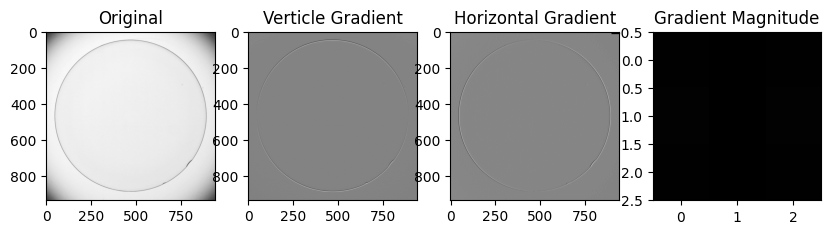

In [34]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
im = cv.imread('IMAGES/contact_lens.tif', cv.IMREAD_ANYCOLOR)
assert im is not None

sobel_v = np.array([[-1,-2,-1],[0,0,0],[1,2,1]], np.float32)
fx = cv.filter2D(im.astype('float'), -1, sobel_v)
fx = cv.normalize(fx.astype('float'), None, 0, 255.0, cv.NORM_MINMAX)

sobel_h= np.array([[-1,0,1],[-2,0,2],[-1,0,1]], np.float32)
fy = cv.filter2D(im.astype('float'), -1, sobel_h)
fy = cv.normalize(fy.astype('float'), None, 0, 255.0, cv.NORM_MINMAX)

abs_fx = np.abs(sobel_v)
abs_fx  = np.abs(sobel_h)

# Add the absolute values of the Sobel gradients pixel-wise to obtain the gradient magnitude
gradient_mag = cv.addWeighted(abs_fx , 0.5, abs_fx , 0.5, 0)

fig, ax = plt.subplots(1,4, figsize=(10,24))
ax[0].imshow(im, cmap = 'gray', vmin=0, vmax=255)
ax[0].set_title('Original')
ax[1].imshow(fx, cmap = 'gray', vmin=0, vmax=255)
ax[1].set_title('Verticle Gradient')
ax[2].imshow(fy, cmap = 'gray', vmin=0, vmax=255)
ax[2].set_title('Horizontal Gradient')
ax[3].imshow(gradient_mag, cmap = 'gray', vmin=0, vmax=255)
ax[3].set_title('Gradient Magnitude')
plt.show()


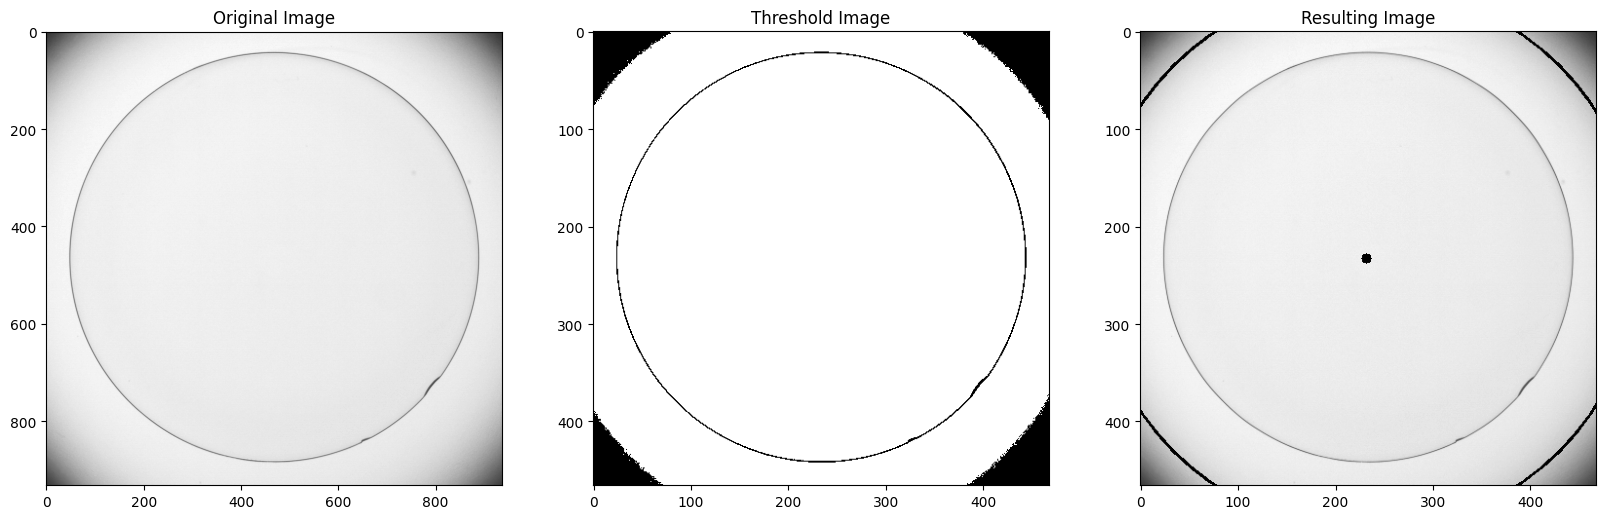

In [37]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv.imread('IMAGES/contact_lens.tif', cv.IMREAD_REDUCED_GRAYSCALE_2)

# Apply a threshold to the image
thresh = cv.threshold(img, 200, 255, cv.THRESH_BINARY)[1]

# Find contours in the thresholded image
contours, hierarchy = cv.findContours(thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# Identify the contour that corresponds to the contact lens
contour_lens = None
for contour in contours:
    area = cv.contourArea(contour)
    perimeter = cv.arcLength(contour, True)

    if perimeter != 0.0:
        circularity = 4 * np.pi * area / (perimeter ** 2)
    else: 
        circularity = 0
   
    if circularity > 0.7 and area > 1000:
        contour_lens = contour
        break

# Compute the center of the contour
M = cv.moments(contour_lens)

if M["m00"] != 0.0:
    center = (int(M["m10"] / M["m00"]), int(M["m01"] / M["m00"]))


# Compute the diameter of the contour
(x, y), radius = cv.minEnclosingCircle(contour_lens)
diameter = int(radius * 2)

# Draw the center and diameter on the image
cv.circle(img, center, 5, (0, 255, 0), -1)
cv.circle(img, center, int(radius), (0, 0, 255), 2)

# Display the result
fig, ax = plt.subplots(1,3, figsize=(20,48))
ax[0].imshow(im, cmap = 'gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[1].imshow(thresh, cmap = 'gray', vmin=0, vmax=255)
ax[1].set_title('Threshold Image')
ax[2].imshow(img, cmap = 'gray', vmin=0, vmax=255)
ax[2].set_title('Resulting Image')
plt.show()
